**Estadística Aplicada**

**Segundo Parcial - Parte Práctica**

*Nombre: Alexandra Guadalupe Valdez Mireles*

*Matrícula: 1910361*

*Grupo: 44*

In [2]:
## Librerías Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Librerias Especializadas
from lifelines import CoxPHFitter, KaplanMeierFitter, ExponentialFitter, WeibullFitter, LogNormalFitter
from lifelines.statistics import logrank_test
import seaborn as sns

In [4]:
## Importar Datos
df_BIL = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')

In [5]:
df_BIL.head()

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


#### 1. ANÁLISIS EXPLORATORIO 

In [6]:
## a) Cuántas variables y cuántas observaciones tiene la base
df_BIL.shape

(1000, 21)

Hay 21 variables y 1000 observaciones

In [7]:
## b) ¿Cuál es el monto promedio de los créditos otorgados por el banco?
df_BIL['cantidad'].mean()

3271.258

In [8]:
## c) ¿Cuál es  el  tiempo  promedio  que  se  tardaron  en  pagar  el  préstamo  los que pagaron el préstamo en su totalidad?
df_BIL.groupby('credito_pagado')['meses'].mean().round(1)

credito_pagado
0    24.9
1    19.2
Name: meses, dtype: float64

El tiempo promedio que se tardaron en pagar el préstamo los que pagaron en su totalidad (1) es de 19.2 meses

In [9]:
## d) Cuál es la tasa de interés promedio otorgada por el banco
df_BIL['tasa_de_interes'].mean()

2.973

In [10]:
## e) Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron
df_BIL.groupby('credito_pagado')['cantidad'].mean().round(1)

credito_pagado
0    3938.1
1    2985.5
Name: cantidad, dtype: float64

In [11]:
df_BIL.groupby('credito_pagado')['tasa_de_interes'].mean().round(1)

credito_pagado
0    3.1
1    2.9
Name: tasa_de_interes, dtype: float64

De los que ya pagaron, el monto promedio es de 2985.5 euros y la tasa de interés promedio es de 2.9

In [41]:
## f) Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado 

De los que no han pagado, el monto promedio es de 3938.1 euros y la tasa de interés promedio es de 3.1 

#### 2. ESTIME UN MODELO DE KAPLAN-MEIER

In [12]:
km1 = KaplanMeierFitter().fit(df_BIL['meses'],df_BIL['credito_pagado'])

In [13]:
km1.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1000,1000
4.0,6,6,0,0,1000
5.0,1,1,0,0,994
6.0,75,66,9,0,993
7.0,5,5,0,0,918
8.0,7,6,1,0,913
9.0,49,35,14,0,906
10.0,28,25,3,0,857
11.0,9,9,0,0,829


In [14]:
km1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
4.0,0.994000
5.0,0.993000
6.0,0.927000
7.0,0.921951
8.0,0.915892
9.0,0.880510
10.0,0.854824
11.0,0.845544


In [ ]:
## a) ¿Cuál es la mediana del tiempo y qué significa?
## b) ¿Es mayor/menor que el tiempo promedio del inciso 1c?

a) La mediana del tiempo es de 24 meses, significa que pasan 24 meses desde que se tramitó el crédito hasta que la mitad de las personas aún no terminan de pagar el crédito. 

b) El tiempo promedio estimado con Kaplan-Meier es mayor que el tiempo promedio del inciso 1C que es de 19 meses. 

#### 3. DETERMINE SI EL RIESGO DE QUE EL PRÉSTAMO SE PAGUE EN SU TOTALIDAD ES CONSTANTE, CRECIENTE, DECRECIENTE, O TIPO LOG-NORMAL RESPECTO AL TIEMPO. 

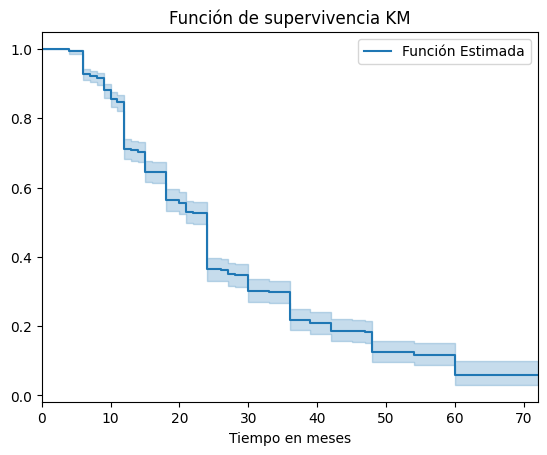

In [15]:
# Gráfica
km1.plot_survival_function(label='Función Estimada')
plt.title('Función de supervivencia KM')
plt.xlabel('Tiempo en meses')
plt.xlim(0,72);

El riesgo es de tipo decreciente, el riesgo de que el préstamo se pague en su totalidad va disminuyendo con respecto al tiempo. 

#### 4. ESTIMAR UN MODELO DE COX PARA VER QUÉ FACTORES INFLUYEN SOBRE EL RIESGO DE QUE EL PRÉSTAMO SE PAGUE EN SU TOTALIDAD. 

In [122]:
df_BIL

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,sin_cuenta,12,pago_algun_credito,mobiliario,1736,menor_100,4_a_7,3,mujer_no_soltera,NaN,...,bienes_raices,31,NaN,propia,1,obrero,1,0,1,1
996,menor_a_cero,30,pago_algun_credito,coche_usado,3857,menor_100,1_a_4,4,hombre_divorciado,NaN,...,seguro_vida,40,NaN,propia,1,administrativo,1,1,1,1
997,sin_cuenta,12,pago_algun_credito,TV,804,menor_100,mas_de_7,4,hombre_soltero,NaN,...,otro_tipo,38,NaN,propia,1,gobierno,1,0,1,1
998,menor_a_cero,45,pago_algun_credito,TV,1845,menor_100,1_a_4,4,hombre_soltero,NaN,...,sin_activos,23,NaN,prestada,1,gobierno,1,1,1,0


In [ ]:
## a) Aparte de “tasa de interes” y “cantidad”, elige otras cuatro variables que creas que afectan el riesgo del evento

Otras cuatro variables que creo que afectan el riesgo del evento son: edad, planes_de_pago, casa y numero_creditos

In [56]:
## b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el riesgo del evento y por qué


La tasa de interés aumenta el riesgo del pago en su totalidad porque si la tasa va subiendo conforme al tiempo para las personas será un problema y deciden pagar pronto. 

La cantidad disminuye el riesgo porque siendo mayor propicia que tarden más en pagar en su totalidad. 

La edad disminuye el riesgo del pago en su totalidad porque teniendo menor edad se complica más cumplir con esa responsabilidad de pagar en un corto tiempo. 

Los planes de pago aumenta el riesgo porque dependiendo el plan la persona se amolda a ese plan para cumplir con el pago en forma y tiempo.

La casa disminuye el riesgo del pago en su totalidad porque si es rentada/comprada la persona igual tiene ese gasto además del crédito y esto puede hacer que se junten sus pagos. 

El número de créditos disminuye el riesgo de pago en su totalidad porque dependiendo la cantidad puede que la persona batalle más tiempo en pagar completamente. 

In [155]:
## c) Realiza las transformaciones adecuadas para utilizar las variables en un modelo de cox
variables4 = df_BIL.loc[:,['meses','cantidad','tasa_de_interes','edad','planes_de_pago','casa','numero_creditos','credito_pagado']]
variables4.head()

,meses,cantidad,tasa_de_interes,edad,planes_de_pago,casa,numero_creditos,credito_pagado
0,6,1169,4,67,NaN,propia,2,1
1,48,5951,2,22,NaN,propia,1,0
2,12,2096,2,49,NaN,propia,1,1
3,42,7882,2,45,NaN,prestada,1,1
4,24,4870,3,53,NaN,prestada,2,0


In [156]:
var_planes = pd.get_dummies(variables4['planes_de_pago'], prefix='plan').astype(int)
var_casa = pd.get_dummies(variables4['casa'], prefix='casa').astype(int)
variables4 = variables4.drop(['planes_de_pago','casa'], axis=1).astype(int)

In [157]:
variables4 = pd.concat([variables4, var_planes, var_casa], axis=1)

In [158]:
variables4

,meses,cantidad,tasa_de_interes,edad,numero_creditos,credito_pagado,plan_bancario,plan_departamental,casa_prestada,casa_propia,casa_renta
0,6,1169,4,67,2,1,0,0,0,1,0
1,48,5951,2,22,1,0,0,0,0,1,0
2,12,2096,2,49,1,1,0,0,0,1,0
3,42,7882,2,45,1,1,0,0,1,0,0
4,24,4870,3,53,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,1,1,0,0,0,1,0
996,30,3857,4,40,1,1,0,0,0,1,0
997,12,804,4,38,1,1,0,0,0,1,0
998,45,1845,4,23,1,0,0,0,1,0,0


In [166]:
## Estadisticas Descriptivas
variables4.describe()

,meses,cantidad,tasa_de_interes,edad,numero_creditos,credito_pagado,plan_bancario,plan_departamental,casa_prestada,casa_propia,casa_renta
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,0.700000,0.13900,0.047000,0.108000,0.713000,0.179000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.458487,0.34612,0.211745,0.310536,0.452588,0.383544
min,4.000000,250.000000,1.000000,19.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [167]:
variables4['credito_pagado'].value_counts()

credito_pagado
1    700
0    300
Name: count, dtype: int64

In [160]:
## d)Estima  un  modelo  de  cox  con  las  variables  elegidas  e  interpreta  los coeficientes.
## Estimacion del modelo
cph4 = CoxPHFitter(penalizer=0.01).fit(variables4, 'meses', 'credito_pagado')
cph4.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4055.20
         time fit was run = 2023-10-08 00:52:28 UTC

---
                     coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                  
cantidad            -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
tasa_de_interes     -0.40       0.67       0.04            -0.47            -0.33                 0.63                 0.72
edad                 0.02       1.02       0.00             0.01             0.02                 1.01                 1.02
numero_creditos      0.11       1.11       0.07            -0.02             0.24                 0.98                 1.27
plan_bancario       -0.25       0.78       0.12            -0.48            -0.02                 0.62                 0.98
plan_departamental  -0.44       0.64       0.19            -0.82            -0.07                 0.44                 0.93
casa_prestada       -0.26       0.77       0.48            -1.21             0.69                 0.30                 2.00
casa_propia          0.11       1.12       0.47            -0.82             1.04                 0.44                 2.84
casa_renta           0.01       1.01       0.48            -0.93             0.95                 0.40                 2.58

                     cmp to      z      p   -log2(p)
covariate                                           
cantidad               0.00 -15.91 <0.005     186.89
tasa_de_interes        0.00 -10.90 <0.005      89.45
edad                   0.00   4.65 <0.005      18.18
numero_creditos        0.00   1.62   0.10       3.25
plan_bancario          0.00  -2.13   0.03       4.91
plan_departamental     0.00  -2.31   0.02       5.59
casa_prestada          0.00  -0.53   0.60       0.75
casa_propia            0.00   0.24   0.81       0.30
casa_renta             0.00   0.02   0.98       0.03
---
Concordance = 0.78
Partial AIC = 8128.41
log-likelihood ratio test = 428.36 on 9 df
-log2(p) of ll-ratio test = 285.41

**cantidad:** Su pvalue es menor que alfa, rechazamos Ho significa que la cantidad disminuye el riesgo del pago en su totalidad, por cada euro el riesgo de pago en su totalidad disminuye en un 99.96%

**tasa_de_interes:** Su pvalue es menor que alfa, rechazamos Ho significa que la tasa de interés disminuye el riesgo del pago en su totalidad, por cada porcentaje de interés el riesgo de pago en su totalidad disminuye en un 67% 

**edad:** Su pvalue es menor que alfa, rechazamos Ho significa que la edad aumenta el riesgo del pago en su totalidad, por cada año de edad el riesgo de pago en su totalidad aumenta en un 2%

**numero_creditos:** Su pvalue es mayor que alfa, no rechazamos Ho significa que el número de créditos no tiene efecto sobre el riesgo de pago en su totalidad. 

**plan_bancario, plan_departamental:** Su pvalue es menor que alfa, rechazamos Ho significa que si el plan de pago de la persona es bancario disminuye el riesgo en un 78% y si es departamental disminuye en un 64%. 

**casa_prestada, casa_propia, casa_renta:** Su pvalue es mayor que alfa, no rechazamos Ho significa que la casa no tiene efecto sobre el riesgo de pago del préstamo en su totalidad. 

In [168]:
cph4.hazard_ratios_

covariate
cantidad              0.999642
tasa_de_interes       0.672301
edad                  1.016123
numero_creditos       1.114483
plan_bancario         0.779096
plan_departamental    0.641451
casa_prestada         0.773352
casa_propia           1.120268
casa_renta            1.010402
Name: exp(coef), dtype: float64

#### 5. CON BASE EN LOS CÁLCULOS REALIZADOS, REDACTA UN COMENTARIO INTEGRAL DE POR LO MENOS 250 PALABRAS QUE RESUMA EL ANÁLISIS, REFLEXIONES Y RECOMENDACIONES SOBRE LA POLÍTICA DE OTORGAMIENTO DE CRÉDITOS EN EL BANCO DE LA ILUSIÓN.

El Banco de la Ilusión para otorgar los préstamos o créditos toma en cuenta diversas variables, pero algunas de éstas resulta ser que no son de gran importancia al momento de brindar el servicio, ya que tomando en cuenta que el monto promedio es de 3271 euros que se paga en su totalidad entre 19 y 24 meses puede propiciar que las personas ignoren la responsabilidad y sigan prolongando su pago a más meses, lo cual no es del todo correcto, pero esto también se puede evitar ya que por parte del Banco tienen información sobre sus clientes y deben verificar esta información para corroborar que a la persona se le puede brindar nuevamente el servicio del préstamo. 

En el apartado de la estimación con Kaplan-Meier se observó que el riesgo del pago en su totalidad es decreciente conforme el paso del tiempo, esto indica que las persona entre más dinero se les otorgue mayor será el tiempo en que tarden en pagarlo, por lo cual sería recomendable que el Banco encuentre el punto medio entre los préstamos, que se les brinde máximo una cantidad que se pueda pagar en menos de 20 meses para que sea factible seguir con los préstamos a determinadas personas. 

Por otra parte, están los datos que se recopilan, hay variables que no son del todo necesarias al momento del pago pero que principalmente se ocupan para tener información sobre la vida económica del cliente, por ejemplo en la estimación del Modelo Cox se obtuvo que la casa de la persona no es del todo un factor que afecte de manera positiva o negativa el riesgo pero éste se necesita para saber si la persona tiene gastos de vivienda muy altos o bajos para conocer si se le puede propiciar el préstamo sabiendo si en efecto lo puede pagar en un plazo adecuado; así como ésta variable hay muchas otras pero de esas también se ocuparía hacer su respectivo Modelo Cox. 
Finalmente, como recomendación podría indicar que el Banco debe verificar bien la información entre sus clientes, propiciar beneficios a clientes responsables y evitar brindar más préstamos a clientes que han tenido varios problemas en las variables conocidas. 

